In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
df = pd.read_csv ("/gdrive/MyDrive/PGSS 2022 Comp Sci Lab/britishSeatBeltStudy.csv")

# Load dataset and perform exploratory data analysis 

In [3]:
df

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law,Date
0,107,1687,867,269,9059,0.102972,12,0,1969-01-01
1,97,1508,825,265,7685,0.102363,6,0,1969-02-01
2,102,1507,806,319,9963,0.102062,12,0,1969-03-01
3,87,1385,814,407,10955,0.100873,8,0,1969-04-01
4,119,1632,991,454,11823,0.101020,10,0,1969-05-01
...,...,...,...,...,...,...,...,...,...
187,96,1284,644,521,21626,0.114797,5,1,1984-08-01
188,122,1444,643,429,20195,0.114093,7,1,1984-09-01
189,120,1575,641,408,19928,0.116466,7,1,1984-10-01
190,137,1737,711,490,18564,0.116026,4,1,1984-11-01


In [5]:
df['law'] = df['law'].astype('category')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y/%m/%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DriversKilled  192 non-null    int64         
 1   drivers        192 non-null    int64         
 2   front          192 non-null    int64         
 3   rear           192 non-null    int64         
 4   kms            192 non-null    int64         
 5   PetrolPrice    192 non-null    float64       
 6   VanKilled      192 non-null    int64         
 7   law            192 non-null    category      
 8   Date           192 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(1), int64(6)
memory usage: 12.4 KB


# build a classfication model that is robust to covariates and other confoundng variables

In [ ]:
#df.boxplot('DriversKilled') = df('DriversKilled')

In [12]:
df['DriversKilled'].value_counts()

122    7
134    6
140    6
108    6
117    5
      ..
133    1
121    1
170    1
198    1
90     1
Name: DriversKilled, Length: 82, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


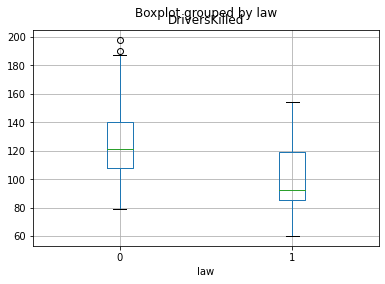

In [8]:
df.boxplot('DriversKilled', 'law')

In [20]:
df['FractionDriversKilled']=df['DriversKilled']/df['drivers']
df['FractionDriversKilled'].describe()

count    192.000000
mean       0.073422
std        0.007249
min        0.051107
25%        0.068414
50%        0.073224
75%        0.078098
max        0.091135
Name: FractionDriversKilled, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


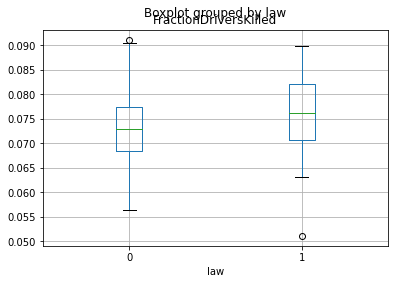

In [22]:
df.boxplot('FractionDriversKilled', 'law')

In [13]:
df['FractionOfFrontKilled']=df['front']/df['drivers']
df['FractionOfFrontKilled'].describe()

count    192.000000
mean       0.500934
std        0.062323
min        0.349966
25%        0.454063
50%        0.495699
75%        0.541146
max        0.669325
Name: FractionOfFrontKilled, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


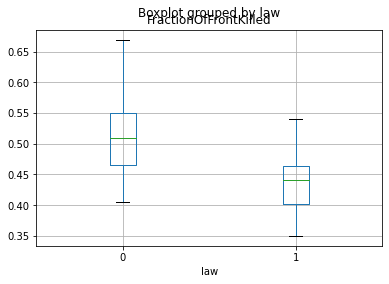

In [15]:
df.boxplot('FractionOfFrontKilled', 'law')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


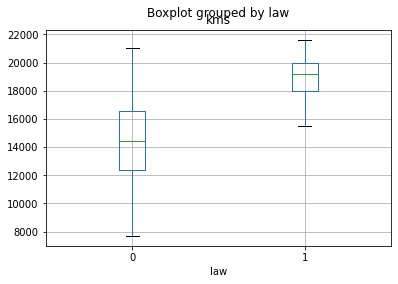

In [19]:
df.boxplot('kms', 'law')

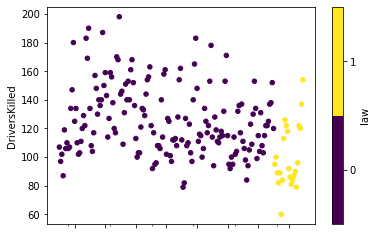

In [17]:
df.plot.scatter(x = 'Date', y = 'DriversKilled', c = 'law', colormap = 'viridis')


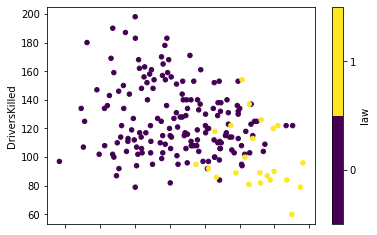

In [18]:
df.plot.scatter(x = 'kms', y = 'DriversKilled', c = 'law', colormap = 'viridis')


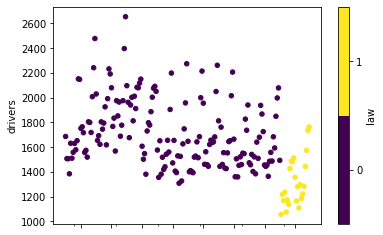

In [24]:
df.plot.scatter(x = 'Date', y = 'drivers', c = 'law', colormap = 'viridis')
#shows the number of drivers decreased

In [25]:
df['law'].astype('category').value_counts()

0    169
1     23
Name: law, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

X=df[['FractionDriversKilled', 'kms']]  # Features
y=df['law'].astype('category')  # Labels

myModel = LogisticRegression()
myModel.fit(X,y)

y_pred = myModel.predict([[0.1, 100]])[0]
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0

In [29]:
y_pred = myModel.predict([[0.01, 100]])[0]
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0

In [32]:
from sklearn.metrics import classification_report
y_pred_proba = myModel.predict_proba(X)[:,1]
y_pred = myModel.predict(X)

# cr = classification_report(y, y_pred>0.15)
cr = classification_report(y, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       169
           1       0.00      0.00      0.00        23

    accuracy                           0.88       192
   macro avg       0.44      0.50      0.47       192
weighted avg       0.77      0.88      0.82       192



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


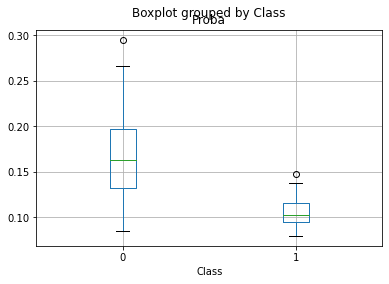

In [33]:
temp = pd.DataFrame({'Class': y, 'Proba': y_pred_proba})

temp.boxplot('Proba', 'Class')

In [34]:
cr = classification_report(y, 1-(y_pred_proba>(0.12)))
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       169
           1       0.45      0.78      0.57        23

    accuracy                           0.86       192
   macro avg       0.71      0.83      0.74       192
weighted avg       0.91      0.86      0.87       192



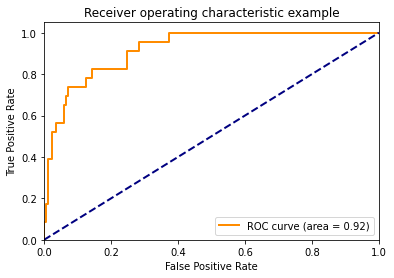

In [39]:
import numpy as np
import matplotlib.pyplot as plt

norma = np.array(y_pred_proba)
norma /= norma.max()

from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y, 1-norma)
roc_auc = auc(fpr, tpr)

plt.show()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()




#Perform linear regression using sklearn in order to model drivers killed

In [44]:
df.columns

Index(['DriversKilled', 'drivers', 'front', 'rear', 'kms', 'PetrolPrice',
       'VanKilled', 'law', 'Date', 'FractionOfFrontKilled',
       'FractionDriversKilled'],
      dtype='object')

In [45]:
from sklearn.linear_model import LinearRegression

X=df[['drivers', 'kms', 'PetrolPrice', 'law']]  # Features
y=df['DriversKilled']   # Labels

myModelRegression = LinearRegression()
myModelRegression.fit(X,y)

y_pred = myModelRegression.predict([[100, 100, 0.1037, 1]])[0]
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


-12.49149303215852

In [42]:
y_pred = myModelRegression.predict([[1000, 1000, 0.1037, 1]])[0]
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


62.59083690703113

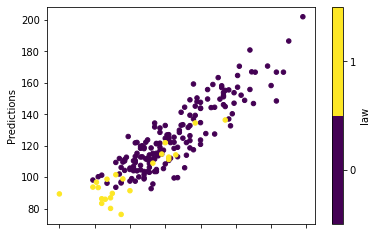

In [47]:
myresults = pd.DataFrame({'Predictions':myModelRegression.predict(X), 'DriversKilled':y, 'law': df['law']})
myresults.plot.scatter(x = 'DriversKilled', y = 'Predictions', c = 'law', colormap = 'viridis')